In [37]:
from IPython.display import HTML
from parsoidbenchmark.analysis import *

df = getDataframe("../data/output-metrics.csv", "../data/views.json")
df = getDiffs(df)
stats = getDiffsStats(df)

# Comparison between legacy parser and parsoid
## Top viewed pages on most visited wikis

Extracted from all web request sampled (1/128) over a month

- enwiki
- jawiki
- frwiki
- eswiki
- ruwiki
- dewiki
- itwiki
- ptwiki

# Optimizations on parsoid output
- Remove HTML comments (required for round tripping)
- Strip dataMW size 
- Strip typeOf size
- Strip sections
- Strip rel size
- Strip span with attribute typeof and replace with inner html
- Strip span with about attribute and replace with inner html
- Strip about ids
- Strip parsoid ids
- Strip all of the above combined

# Comparisons

In the benchmark we compare the following cases

- Per attribute stripping compared with parsoid output
- Combined optimizations compared with parsoid output
- Combined optimizations compared with legacy parser output

All of these cases are weighted by the number of pageviews each page for that month

# Notes

- zhwiki was removed from the benchmark because `data-mw-variant` was bloating the output and was skewing the data
- toc/edit-sections divs were remove from the legacy parser output
- legacy parser raised errors when it encountered redirections were parsoid was following redirections

# Stats per category

In [38]:
stats

stripDatamw  stripSections     stripRel  stripTypeof  \
count  7920.000000    7920.000000  7920.000000  7920.000000   
mean    -10.614349      -0.502070    -1.310186    -1.061425   
std       4.324101       0.559195     0.384727     0.412645   
min     -60.789074     -24.533330    -8.267717    -5.426820   
25%     -12.679871      -0.602180    -1.477561    -1.324583   
50%     -10.288709      -0.438981    -1.254356    -0.968434   
75%      -7.958956      -0.314031    -1.071144    -0.748435   
max       0.000000      -0.032589    -0.122773     0.000000   

       stripSpanMWEntity  stripSpanAbout  stripAboutIds  stripParsoidIds  \
count        7920.000000     7920.000000    7920.000000      7920.000000   
mean           -0.195606       -0.069969      -2.508674       -11.559135   
std             0.277960        0.116217       1.116018         4.042867   
min            -7.293443       -3.496941     -12.788580       -57.906210   
25%            -0.224617       -0.083531      -3.118491       -13.421932   
50%            -0.119584       -0.040010      -2.417829       -11.125312   
75%            -0.063133       -0.016607      -1.750678        -9.131865   
max             0.041009        0.036017       0.000000        -0.130838   

         stripFull  stripFullLegacy  
count  7920.000000      7920.000000  
mean    -27.191278        -0.723984  
std       6.290898         5.684361  
min     -76.858657       -27.311481  
25%     -30.966658        -1.416012  
50%     -27.125395         0.990402  
75%     -22.988553         2.334545  
max      -5.473468       218.333333

# Size reduction per optimization

In [39]:
showColumnHistQuantile(df, getDiffColumns()[0], 0, 1)

In [40]:
showColumnHistQuantile(df, getDiffColumns()[1], 0, 1)

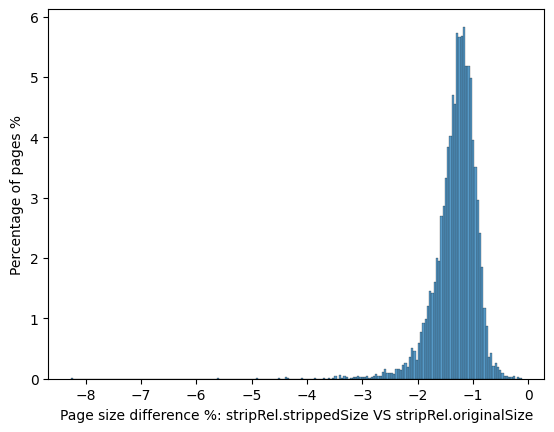

In [41]:
showColumnHistQuantile(df, getDiffColumns()[2], 0, 1)

In [42]:
showColumnHistQuantile(df, getDiffColumns()[3], 0, 1)

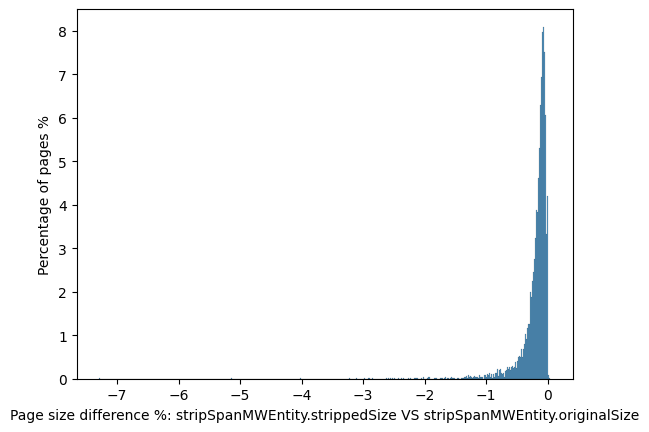

In [43]:
showColumnHistQuantile(df, getDiffColumns()[4], 0, 1)

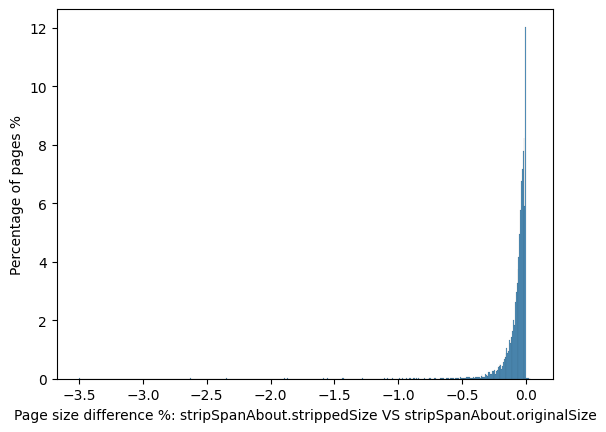

In [44]:
showColumnHistQuantile(df, getDiffColumns()[5], 0, 1)

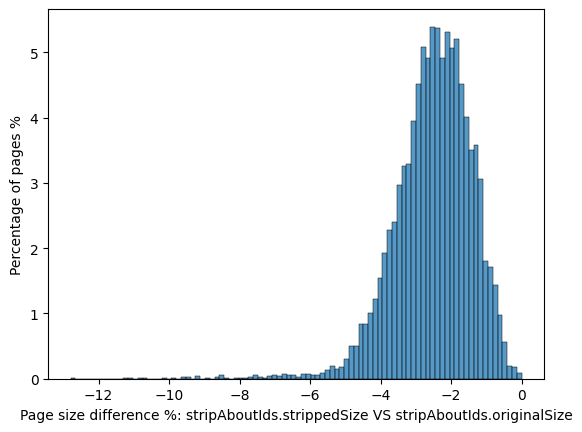

In [45]:
showColumnHistQuantile(df, getDiffColumns()[6], 0, 1)

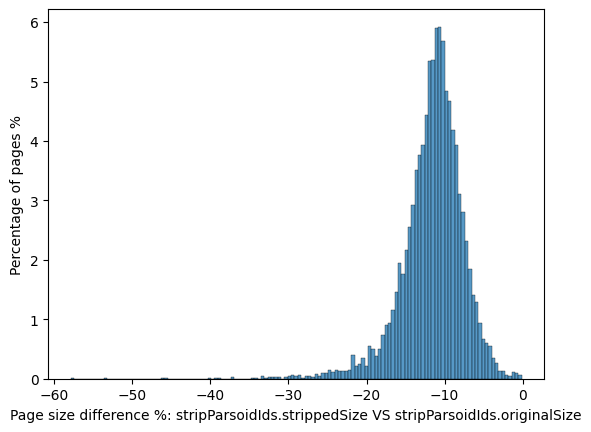

In [46]:
showColumnHistQuantile(df, getDiffColumns()[7], 0, 1)

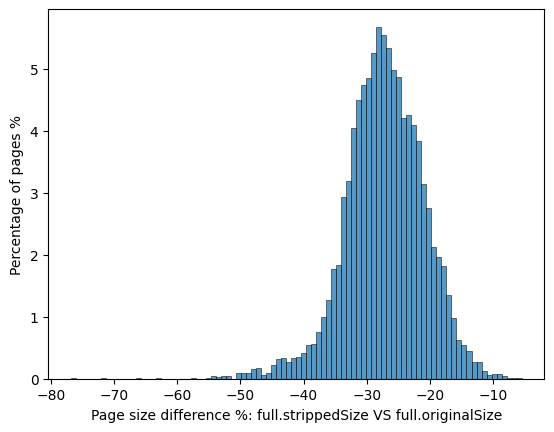

In [47]:
showColumnHistQuantile(df, getDiffColumns()[8], 0, 1)

# Comparison between fully stripped VS legacy parser

## Size reduction ratio < q85

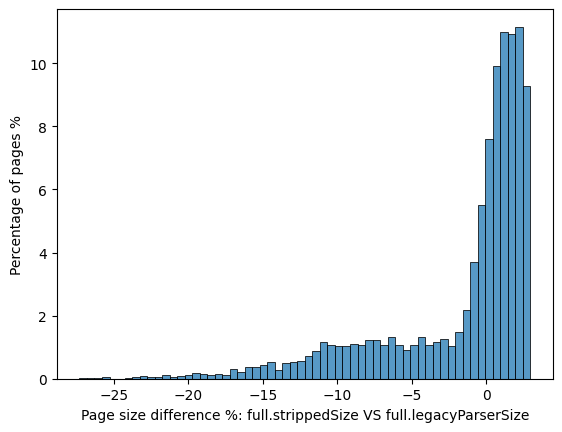

In [48]:
showColumnHistQuantile(df, getDiffColumns()[9], 0, 0.85)

## Size reduction ratio [q85, q99]

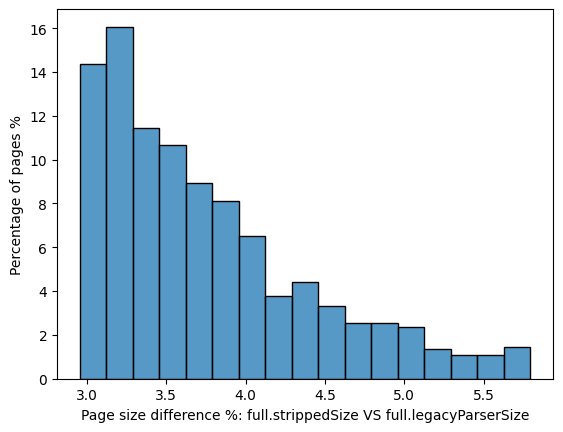

In [49]:
showColumnHistQuantile(df, getDiffColumns()[9], 0.85, 0.99)

## Size reduction ratio < q99

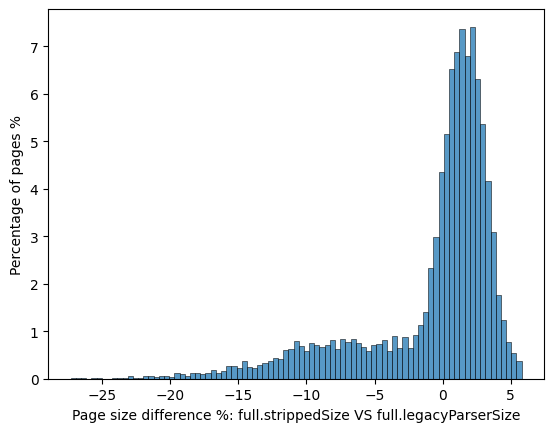

In [50]:
showColumnHistQuantile(df, getDiffColumns()[9], 0, 0.99)

## Size reduction ratio > q99

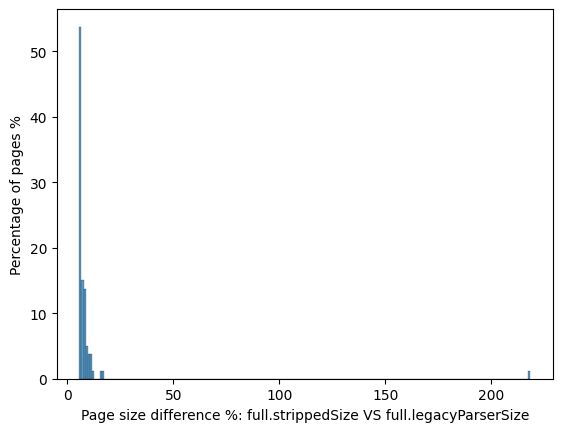

In [51]:
showColumnHistQuantile(df, getDiffColumns()[9], 0.99, 1)

## Stats for stripped parsoid VS legacy parser > q99

In [52]:
tail = df[df["stripFullLegacy"] > df["stripFullLegacy"].quantile(0.99)].sort_values(by="stripFullLegacy")
print(tail["stripFullLegacy"].describe())

count     80.000000
mean      10.042346
std       23.672437
min        5.808804
25%        6.081614
50%        6.658650
75%        8.156166
max      218.333333
Name: stripFullLegacy, dtype: float64


## Analysis of pages on the upper q99 tail

In [53]:
out = tail[["domain", "title", "stripFullLegacy"]]
HTML(out.to_html())

## Analysis of pages on the lower 1% tail

In [54]:
lowerTail = df[df["stripFullLegacy"] < df["stripFullLegacy"].quantile(0.1)].sort_values(by="stripFullLegacy")
out = lowerTail[["domain", "title", "stripFullLegacy"]]
HTML(out.to_html())
